## Simulación Normales Multivariadas

### Julian Ferres - Nro.Padrón 101483

## Enunciado

 Sea $n = 10, 100, 1000, 10000, \ldots$

Simular $ n /2 $ puntos de las normales multivariadas:

$ X_1 \sim \mathcal{N}( \mu_1,\,\Sigma )$

$ X_2 \sim \mathcal{N}( \mu_2,\,\Sigma )$

siendo:

- $\mu_1 = (-1,0)$ 
- $\mu_2 = (1,0)$
- $\Sigma = \mathbb{1}$ (matriz identidad)

## Solución

In [2]:
#Import libraries
import numpy as np
import pandas as pd
from scipy.spatial import ConvexHull
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
n = 1000 #Tamaño de muestra

In [4]:
muestra = np.zeros((n,3))

#### Toma de muestra

In [5]:
mean1 = [-1, 0]
mean2 = [1, 0]
cov = [[1, 0], [0, 1]]  # diagonal covariance

x1, y1 = np.random.multivariate_normal(mean1, cov, int(n/2)).T
x2, y2 = np.random.multivariate_normal(mean2, cov, int(n/2)).T

In [6]:
x1 = pd.Series(x1, name="$X_1$")
x2 = pd.Series(x2, name="$X_2$")
y1 = pd.Series(y1, name="$Y_1$")
y2 = pd.Series(y2, name="$Y_2$")

In [7]:
normal_0 = np.column_stack((x1,y1))
normal_1 = np.column_stack((x2,y2))

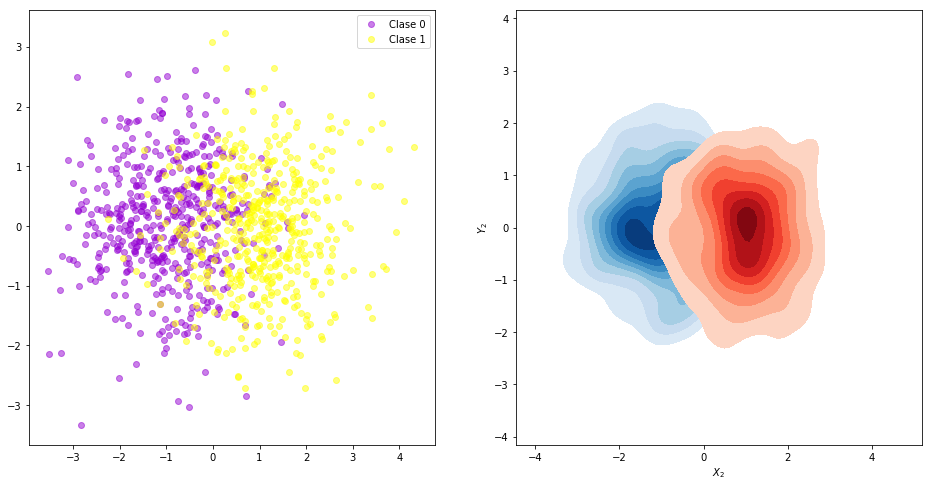

In [8]:
f, ax = plt.subplots(ncols = 2 , figsize=(16, 8))

g = ax[0].scatter( x1, y1 , alpha='0.5', color='darkviolet' ,  label = 'Clase 0');
g = ax[0].scatter( x2, y2, alpha='0.5', color='yellow' , label = 'Clase 1');
ax[0].legend()

# Draw the two density plots
ax[1] = sns.kdeplot(x1, y1,
                 cmap= "Blues", shade=True, shade_lowest = False)
ax[1] = sns.kdeplot(x2, y2,
                 cmap="Reds", shade=True, shade_lowest = False)

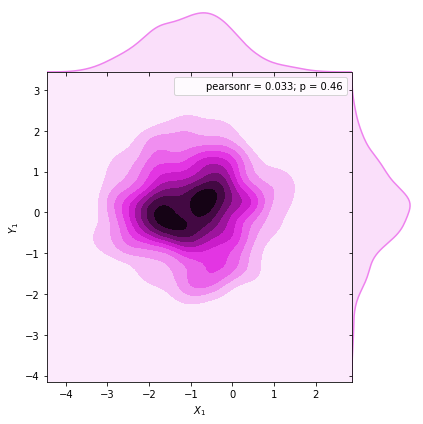

In [15]:
g = sns.jointplot(x1, y1, color = 'violet' , kind="kde", space=0)

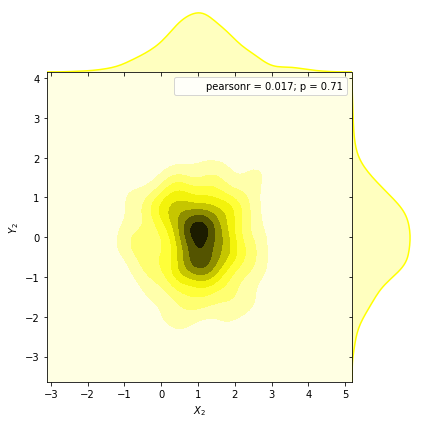

In [12]:
g = sns.jointplot(x2, y2, color = 'yellow' , kind="kde", space=0)

### Muestro los puntos con su envolvente convexa

In [10]:
hull0 = ConvexHull( normal_0 )
hull1 = ConvexHull( normal_1 )

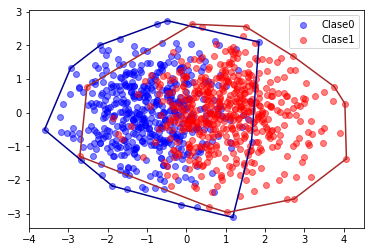

In [11]:
plt.scatter(x1, y1, color='blue' , alpha = 0.5 , label = 'Clase0')
for simplex in hull0.simplices:
    plt.plot(normal_0[simplex, 0], normal_0[simplex, 1], 'k-' , color = 'darkblue')
    
plt.scatter(x2, y2 , color='red' , alpha = 0.5 , label = 'Clase1')
for simplex in hull1.simplices:
    plt.plot(normal_1[simplex, 0], normal_1[simplex, 1], 'k-' , color = 'brown')
    
plt.legend()